/Users/atularavinddas/Documents/GitHub/US_Income_Maps/US_Income_Maps/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
0      33      007  00873177  0500000US33007  33007        Coos   06   
1      33      015  00873181  0500000US33015  33015  Rockingham   06   
2      33      017  00873182  0500000US33017  33017   Strafford   06   
3      33      003  00873175  0500000US33003  33003     Carroll   06   
4      33      013  00873180  0500000US33013  33013   Merrimack   06   

        ALAND     AWATER                                           geometry  
0  4647907788   92560510  POLYGON ((-71.76498 44.40659, -71.76197 44.407...  
1  1801042594  258639092  MULTIPOLYGON (((-70.61702 42.97718, -70.61529 ...  
2   951960024   38940456  POLYGON ((-71.24697 43.27619, -71.23601 43.284...  
3  2413511276  159624443  POLYGON ((-71.5646 43.89317, -71.37487 43.9146...  
4  2416139337   57236576  POLYGON ((-72.07862 43.33859, -72.05159 43.376...  


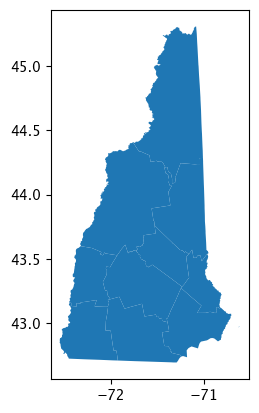

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import warnings
import pandas as pd
import os

counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip')

nh_counties = counties[counties['STATEFP'] == '33']


os.makedirs('.../nh_county_shapefiles', exist_ok=True)
nh_counties.to_file('../nh_county_shapefiles/nh_counties.shp')

nh_counties = gpd.read_file('../nh_county_shapefiles/nh_counties.shp')


print(nh_counties.head())

nh_counties.plot()
plt.show()

# Generate New Hampshire County Maps

In [3]:
nh_parameters=pd.read_csv("../New_England_Datasets/NEW ENGLAND's data (states) - NH.csv")
nh_parameters

,COUNTY,Population,Income (per capita),Education \n(high school or higher attendance rate),Health (life expectancy),Crime rate (per population)
0,BELKNAP,"60,088","$50,886",94.00%,77.1,0.0750
1,CARROLL,"47,818","$49,562",95.60%,77.2,0.0250
2,CHESHIRE,"77,117","$45,561",94.10%,79.6,0.0375
3,COÖS,"33,055","$36,850",89.50%,77.2,0.0250
4,GRAFTON,"89,118","$50,133",95.50%,80.7,0.0250
5,HILLSBOROUGH,"400,721","$53,463",93.00%,79.4,0.1750
6,MERRIMACK,"146,445","$47,178",94.60%,79.5,0.2000
7,ROCKINGHAM,"295,223","$59,571",96.10%,80.8,0.3000
8,STRAFFORD,"123,143","$42,999",93.90%,78.2,0.1000
9,SULLIVAN,"43,742","$41,921",91.10%,79.7,0.0375


In [4]:
nh_parameters.columns.tolist()

['COUNTY',
 'Population',
 'Income (per capita)',
 'Education \n(high school or higher attendance rate)',
 'Health (life expectancy)',
 'Crime rate (per population)']

In [5]:
nh_counties['NAME']=nh_counties['NAME'].str.upper()


In [6]:
nh_counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,33,007,00873177,0500000US33007,33007,COOS,06,4647907788,92560510,"POLYGON ((-71.76498 44.40659, -71.76197 44.407..."
1,33,015,00873181,0500000US33015,33015,ROCKINGHAM,06,1801042594,258639092,"MULTIPOLYGON (((-70.61702 42.97718, -70.61529 ..."
2,33,017,00873182,0500000US33017,33017,STRAFFORD,06,951960024,38940456,"POLYGON ((-71.24697 43.27619, -71.23601 43.284..."
3,33,003,00873175,0500000US33003,33003,CARROLL,06,2413511276,159624443,"POLYGON ((-71.5646 43.89317, -71.37487 43.9146..."
4,33,013,00873180,0500000US33013,33013,MERRIMACK,06,2416139337,57236576,"POLYGON ((-72.07862 43.33859, -72.05159 43.376..."
5,33,001,00873174,0500000US33001,33001,BELKNAP,06,1040771458,176549428,"POLYGON ((-71.73153 43.59072, -71.73062 43.592..."
6,33,005,00873176,0500000US33005,33005,CHESHIRE,06,1830367249,57589032,"POLYGON ((-72.55725 42.85302, -72.55627 42.855..."
7,33,011,00873179,0500000US33011,33011,HILLSBOROUGH,06,2270232096,41279762,"POLYGON ((-72.06125 42.96581, -72.0588 43.0051..."
8,33,019,00873183,0500000US33019,33019,SULLIVAN,06,1392231688,37791729,"POLYGON ((-72.45256 43.17212, -72.45143 43.172..."
9,33,009,00873178,0500000US33009,33009,GRAFTON,06,4425249656,106464220,"POLYGON ((-72.3344 43.61925, -72.33236 43.6250..."


In [7]:
nh_counties['Population'] = nh_parameters['Population'].str.replace(',', '').astype(float)
nh_counties['Income'] = nh_parameters['Income (per capita)'].str.replace('$', '').str.replace(',', '').astype(float)
nh_counties['Education']=nh_parameters['Education \n(high school or higher attendance rate)'].str.replace('%', '').astype(float)
nh_counties['Health']=nh_parameters['Health (life expectancy)']
nh_counties['Crime Rate']=nh_parameters['Crime rate (per population)']

nh_counties['Income'] = pd.to_numeric(nh_counties['Income'], errors='coerce')
nh_counties['Education'] = pd.to_numeric(nh_counties['Education'], errors='coerce')
nh_counties['Health'] = pd.to_numeric(nh_counties['Health'], errors='coerce')
nh_counties['Crime Rate'] = pd.to_numeric(nh_counties['Crime Rate'], errors='coerce')
nh_counties['Population'] = pd.to_numeric(nh_counties['Population'], errors='coerce')



In [9]:
nh_counties = nh_counties.dissolve(by='NAME', aggfunc='first').reset_index()




nh_counties = nh_counties.to_crs(epsg=4326)

m = folium.Map(location=[44, -71], zoom_start=6)


# All your choropleth layers
folium.Choropleth(
    geo_data=nh_counties,
    name='Income',
    data=nh_counties,
    columns=['NAME', 'Income'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Income per Capita ($)',
    overlay=True,
    show=True
).add_to(m)

folium.Choropleth(
    geo_data=nh_counties,
    name='Education',
    data=nh_counties,
    columns=['NAME', 'Education'],
    key_on='feature.properties.NAME',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Education (%)',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=nh_counties,
    name='Healthcare',
    data=nh_counties,
    columns=['NAME', 'Health'],
    key_on='feature.properties.NAME',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Life Expectancy',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=nh_counties,
    name='Crime Rate',
    data=nh_counties,
    columns=['NAME', 'Crime Rate'],
    key_on='feature.properties.NAME',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=nh_counties,
    name='Population',
    data=nh_counties,
    columns=['NAME', 'Population'],
    key_on='feature.properties.NAME',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Population',
    overlay=True,
    show=False
).add_to(m)

# Create a feature group with higher z-index for tooltips
tooltip_layer = folium.FeatureGroup(name='State Info', overlay=True, control=True, show=True)

# Add GeoJson to the feature group
folium.GeoJson(
    nh_counties,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'Population', 'Income', 'Education', 'Health', 'Crime Rate'],
        aliases=['County:', 'Population:', 'Income/capita:', 'Education %:', 'Life Expectancy:', 'Crime Rate:'],
        style='background-color: white; color: black; font-size: 12px; padding: 10px;',
        sticky=False
    ),
    style_function=lambda x: {
        'fillOpacity': 0,
        'color': 'black',
        'weight': 0.5,
        'zIndex': 1000  # High z-index to stay on top
    },
    highlight_function=lambda x: {
        'weight': 2,
        'color': 'yellow'
    }
).add_to(tooltip_layer)


tooltip_layer.add_to(m)

folium.LayerControl().add_to(m)

m.save('../maps/nh_counties_map.html')